In [170]:
#import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [164]:
#load repeatmasker df
rmsk=pd.read_csv('../../data/rmsk/mm_rmsk', sep='\t')
rmsk=rmsk.set_index('chrom')
rmsk['repclass']=rmsk['name'].apply(lambda rm_name:rm_name.split('#')[1])
rmsk.head(n=10)

,#bin,chromStart,chromEnd,name,score,strand,alignStart,alignEnd,reserved,blockCount,blockSizes,blockRelStarts,id,repclass
chrom,,,,,,,,,,,,,,
chr1,0,67105220,67112687,Lx8#LINE/L1,2460,-,67105220,67105453,0,3,"0,233,7234","-1,0,-1",102289,LINE/L1
chr1,0,67106484,67109033,IMPB_01#Satellite,1380,-,67108951,67109033,0,3,"2467,82,0","-1,2467,-1",102296,Satellite
chr1,0,67108423,67109233,RLTR17B_Mm#LTR/ERVK,2480,+,67108752,67108881,0,3,"328,129,352","-1,329,-1",102294,LTR/ERVK
chr1,0,134213230,134219739,L1MCa#LINE/L1,2450,+,134215461,134215559,0,3,"2230,98,4180","-1,2231,-1",221077,LINE/L1
chr1,0,134215878,134222208,L1MA4#LINE/L1,3180,+,134221587,134221954,0,5,"5708,79,0,252,254","-1,5709,-1,5824,-1",221089,LINE/L1
chr1,0,134217595,134217745,BC1_Mm#scRNA,3460,-,134217651,134217732,0,3,"56,81,13","-1,56,-1",221082,scRNA
chr1,1,8382263,8388659,L1M3#LINE/L1,3310,-,8383854,8384904,0,7,"1591,369,27,280,0,45,3755","-1,1591,-1,1970,-1,2596,-1",7485,LINE/L1
chr1,1,8386825,8400131,Lx2#LINE/L1,1583,-,8386825,8399537,0,7,"0,2730,-17,1629,0,1720,594","-1,0,-1,9336,-1,10992,-1",7489,LINE/L1
chr1,1,16771602,16778231,L1VL1#LINE/L1,690,+,16771819,16775853,0,3,"216,4034,2378","-1,217,-1",20663,LINE/L1


In [162]:
#load numts
numts=pd.read_csv('/Volumes/motilin/balint/numt/mice_strains_numt/csvs/Mus_musculus_numts.csv')
numts=numts.set_index('g_id')
numts.head(n=10)

,score,eg2_value,e_value,g_start,mt_start,g_length,mt_length,g_strand,mt_strand,g_size,g_sequence,mt_sequence
g_id,,,,,,,,,,,,
MT,16298,0.000000e+00,0.000000e+00,0,0,16298,16298,+,+,16299,GTTAATGTAGCTTAATAACAAAGCAAAGCACTGAAAATGCTTAGAT...,GTTAATGTAGCTTAATAACAAAGCAAAGCACTGAAAATGCTTAGAT...
4,2464,0.000000e+00,0.000000e+00,79920566,12487,2871,2869,+,+,156860686,AAGTACAATAGTAGTTGCAGGAATCTTTCTACTGGTCCGATTTCAC...,AAGTACAATAGTAGTTGCAGGAATTTTCCTACTGGTCCGATTCCAC...
5,731,0.000000e+00,0.000000e+00,84766087,4846,1588,1594,+,+,151758149,AAAATAATTACCCACCACACATGCTTCAAAAATAACTTTATCCTTc...,AAAataataactcaCCAAACAAAAACTAAACCCAACCTAATATTTT...
4,695,0.000000e+00,0.000000e+00,9958624,3198,1326,1316,+,+,156860686,TTATATCAGTCCTATTAATAAGCAGGTCACTTTCTCTACAAATATG...,TTTTATCAGTTCTATTAATAAATGGATCCTACTCTCTACAAACACT...
5,618,2.300000e-277,3.800000e-281,7326298,14714,1002,1000,+,+,151758149,GCCATAGTAATTTTTCATCTCCTTTTTCCTTCACAAAACAGGATCA...,GCCCTAGCAATCGTTCACCTCCTCTT-CCTCCACGAAACAGGATCA...
8,459,1.100000e-201,1.900000e-205,102750360,14921,1183,1214,+,+,130127694,AATGCCCTCCATACCCTACCCCACATTAAACCAGAATGATACTTCC...,AATCCACTAAACACCCCACCCCATATTAAACCCGAATGATATTTCC...
1,439,3.700000e-192,6.200000e-196,132718462,15420,634,634,+,+,195154279,TGTGTACATAAAATTATCTAGTACAATAGAACATTAATGTATatgg...,TGAGTACATAAATttacatagtacaacagtacatttatgtatatcg...
9,400,1.300000e-173,2.300000e-177,15232031,4396,879,923,+,+,124359700,ATTCTCATAGGAACATGAGGTGGACTTAAGCATACACAAATGTGAA...,ATTTTCATAGGGGCATGAGGAGGACTTAACCAAACACAAATACGAA...
12,363,5.500000e-156,9.300000e-160,97028201,15674,365,365,+,+,120092757,TTTGGTCTATTAATCTACCATCCTCCGTGAAACCAACAACCCGCCC...,TTTGGTCTATTAATCTACCATCCTCCGTGAAACCAACAACCCGCCC...


In [69]:
#get just the crhomosomes
rmsk=rmsk.loc[['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8',
       'chr9', 'chr10', 'chr11', 'chr12', 'chr13',
       'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19']]
numts=numts.loc[['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '2',
       '3', '4', '5', '6', '7', '8', '9']]
rmsk=rmsk.loc[['chr18']]

In [70]:
#cut chr off from chr ids
rmsk.index=pd.Series(rmsk.index.values).apply(lambda chr_id:chr_id.split('chr')[1])

In [72]:
numt_test=numts.loc['18'].sort_values(by='g_start')
numt_array=set(np.concatenate(numt_test.apply(lambda row: np.arange(row['g_start'],(row['g_start']+row['g_length'])),axis=1)))

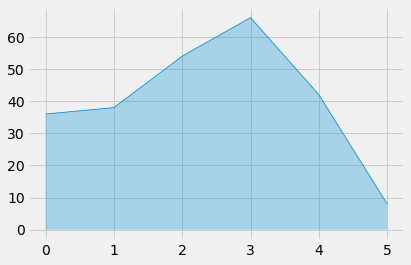

In [186]:
#trial sliding window for GC content
gc='ACGATGCTAGCTAGCGTATGCTAGCTAGCTAGTTATATTATATTTATCTCGGCTCGAAAACTCGATCGCTAGCTGCATCGCGCGCGCGATTCGCGCGCGGCGATCG'
gc_cont=[]
step_size=20
window_size=50
for i in np.arange(0,len(gc),step_size):
    g_cont=gc[i:i+window_size].count('G')
    c_cont=gc[i:i+window_size].count('C')
    gc_cont.append(((g_cont+c_cont)/window_size)*100)
plt.plot(np.arange(0,len(gc_cont)),gc_cont,linewidth=0.8)
plt.fill_between(np.arange(0,len(gc_cont)),gc_cont,alpha=0.3)

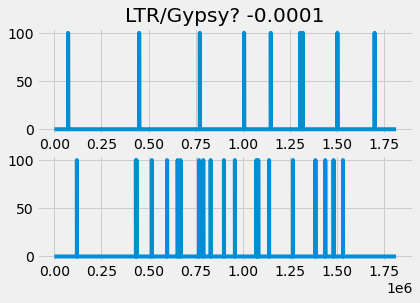

In [158]:
def sliding_window(repclass,chr_size,window_size,step_size,numt_array):
    plt.style.use('fivethirtyeight')
    rmsk_test=rmsk.loc[rmsk['repclass']==repclass]
    rmsk_array=set(np.concatenate(rmsk_test.apply(lambda row: np.arange(row['chromStart'],row['chromEnd']),axis=1)))
    repeats=[]
    numts=[]
    for i in np.arange(0,chr_size,step_size):
        window=set(np.arange(i,i+window_size))
        repeats.append((len(window&rmsk_array)/window_size)*100)
        numts.append((len(window&numt_array)/window_size)*100)
    if pearsonr(repeats,numts)[0]>0.3 or pearsonr(repeats,numts)[0]<-0.3:
        fig,axs=plt.subplots(2,1)
        axs[0].plot(numts)
        axs[1].plot(repeats)
        axs[0].set_title(repclass+' '+str(round(pearsonr(repeats,numts)[0],4)))
        plt.savefig(f'../data/sliding_windows/{repclass}.png')
    
sliding_window('LTR/Gypsy?',numt_test['g_size'][0],100,50,numt_array)

In [161]:
import re
pd.Series(rmsk['repclass'].unique()).apply(lambda repclass:re.sub(r'[\\/*?:"<>|]',"",repclass))

0              LINEL1
1        LTRERVL-MaLR
2              SINEB2
3             LTRERV1
4     DNATcMar-Tigger
           ...       
56            LTRERV1
57        DNAPiggyBac
58        DNAPiggyBac
59         RCHelitron
60           SINEtRNA
Length: 61, dtype: object

In [166]:
axs[0].plot(np.arange(0,len(numts),numts,linewidth=0.8)
axs[1].plot(np.arange(0,len(repeats)),repeats,linewidth=0.8)
axs[0].fill(np.arange(0,len(numts)),numts,alpha=0.3)
axs[1].fill(np.arange(0,len(repeats)),repeats,alpha=0.3)
axs[0].set_title(repclass+' '+str(round(pearsonr(repeats,numts)[0],4)))

,#bin,chromStart,chromEnd,name,score,strand,alignStart,alignEnd,reserved,blockCount,blockSizes,blockRelStarts,id,repclass
chrom,,,,,,,,,,,,,,
chrM,585,0,3310,LSU-rRNA_Hsa#rRNA,3280,+,2000,2177,0,3,"3725,177,1133","-1,2000,-1",4255473,rRNA
chrM,585,922,953,A-rich#Low_complexity,1160,+,923,953,0,3,"0,30,0","-1,1,-1",4255472,Low_complexity
chrM,585,2674,2753,tRNA-Leu-TTA(m)#tRNA,2430,+,2676,2750,0,3,"1,74,3","-1,2,-1",4255474,tRNA
chrM,585,3768,3842,tRNA-Gln-CAA_#tRNA,1130,-,3771,3842,0,3,"3,71,0","-1,3,-1",4255475,tRNA
chrM,585,6866,6938,tRNA-Ser-TCA(m)#tRNA,1740,-,6869,6938,0,3,"3,69,0","-1,3,-1",4255476,tRNA
chrM,585,11298,11406,(ATTATC)n#Simple_repeat,2150,+,11299,11406,0,3,"0,107,0","-1,1,-1",4255477,Simple_repeat


In [191]:
rmsk.loc['chr18']['repclass'].value_counts()

Simple_repeat     45954
LINE/L1           20426
SINE/Alu          16433
LTR/ERVL-MaLR     11957
SINE/B4           11318
                  ...  
LINE/Dong-R4          2
DNA/TcMar             2
DNA/PiggyBac?         1
DNA/TcMar-Pogo        1
SINE?/tRNA            1
Name: repclass, Length: 61, dtype: int64

In [192]:
rmsk.loc['chr18']['name'].value_counts()

B3#SINE/B2                  3994
RSINE1#SINE/B4              3443
(AC)n#Simple_repeat         3235
(TG)n#Simple_repeat         3025
ID_B1#SINE/B4               3025
                            ... 
(GAGAGCA)n#Simple_repeat       1
(CTGCCC)n#Simple_repeat        1
(GGAGCC)n#Simple_repeat        1
(TCCCTTG)n#Simple_repeat       1
(TCTAATT)n#Simple_repeat       1
Name: name, Length: 4054, dtype: int64